<center><font color="brown" size="6"><b>Week 19: Graded Mini Project</b></font></center>

**Project title**: Sentiment Analysis on Twitter Data Using RNN

**Objective**: Classify tweets as positive, negative, or neutral by building a deep learning model with an RNN architecture. This project simulates a full NLP pipeline—from data cleaning to model optimization—as typically seen in industries like social media analytics, customer service, and marketing tech.

## <font color="brown">Task 1: Data Cleaning and Preprocessing</font>

### <font color="orange">A. Load the Dataset</font>

In [66]:
import pandas as pd

df = pd.read_csv('Dataset - Twitter-training.csv', header=None)

# Preview
print("First 5 rows:")
display(df.head())

# Dataset info
print("\nDataset Info:")
print(df.info())

# Numerical summary
print("\nStatistical Summary (Numeric Columns):")
display(df.describe())



First 5 rows:


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74682 non-null  int64 
 1   1       74682 non-null  object
 2   2       74682 non-null  object
 3   3       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

Statistical Summary (Numeric Columns):


,0
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [67]:
df.columns = ["id", "topic", "sentiment", "tweet"]

df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   topic      74682 non-null  object
 2   sentiment  74682 non-null  object
 3   tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


,id,topic,sentiment,tweet
count,74682.000000,74682,74682,73996
unique,NaN,32,4,69491
top,NaN,Microsoft,Negative,"At the same time, despite the fact that there ..."
freq,NaN,2400,22542,172
mean,6432.586165,NaN,NaN,NaN
std,3740.427870,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


### <font color="orange">B. Data Cleaning</font>

#### 1. Handle any missing or duplicate entries.

In [68]:
df = df.drop_duplicates().reset_index(drop=True)
df = df.dropna(subset=["tweet"]).reset_index(drop=True)

print("Shape after cleaning:", df.shape)

Shape after cleaning: (71656, 4)


#### 2. Clean Tweet Text: Remove URLs, mentions, hashtags, punctuations, and special characters.

In [69]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+","", text)
    text = re.sub(r"@\w+","", text)
    text = re.sub(r"#\w+","", text)
    text = re.sub(r"[^A-Za-z0-9 ]+"," ", text)
    text = text.lower()
    return re.sub(r"\s+"," ", text).strip()

df["clean_text"] = df["tweet"].apply(clean_text)
df.head()


,id,topic,sentiment,tweet,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


#### 3. Normalize Text: Convert to lowercase, tokenize, remove stop words. (with explanation).

In [70]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')   # NEW resource required
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def normalize(text):
    text = text.lower()
    tokens = word_tokenize(text)                  # Tokenize
    tokens = [t for t in tokens if t not in stop_words]  # Remove stopwords
    return tokens

df['tokens'] = df['clean_text'].apply(normalize)

#### 4. Apply Stemming or Lemmatization: Choose one technique and justify your choice.

In [72]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df['lemmas'] = df['tokens'].apply(lambda t: [lemmatizer.lemmatize(w) for w in t])

df.head()

,id,topic,sentiment,tweet,clean_text,tokens,lemmas
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,"[im, getting, borderlands, murder]","[im, getting, borderland, murder]"
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,"[coming, borders, kill]","[coming, border, kill]"
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,"[im, getting, borderlands, kill]","[im, getting, borderland, kill]"
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]","[im, coming, borderland, murder]"
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]","[im, getting, borderland, 2, murder]"


**Why Lemmatization?**

- Produces dictionary words
- Preserves meaning
- Better for deep learning models (LSTM/GRU) because vocabulary remains meaningful
- Prevents over-fragmenting words into meaningless roots

### <font color="orange">C. Feature Engineering</font>

#### 1. Convert Text to Numerical Features: Use TF-IDF / Word2Vec / embedding layers (state your choice and why).

In [73]:
# Convert token lists to string format
df['final_text'] = df['lemmas'].apply(lambda x: ' '.join(x))

from tensorflow.keras.preprocessing.text import Tokenizer

MAX_WORDS = 20000
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['final_text'])

word_index = tokenizer.word_index
print("Vocabulary size:", len(word_index))

# Convert to sequences
sequences = tokenizer.texts_to_sequences(df['final_text'])

Vocabulary size: 27803


#### 2. Create Padded Sequences: Tokenize and pad input sequences for uniform RNN input.

In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 50
padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')

print("Example padded sequence:\n", padded_sequences[0])

Example padded sequence:
 [ 209   97   87 1444    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [75]:
# ------------------------------------------
# Encode Sentiment Labels
# ------------------------------------------

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(df['sentiment'])

print("Label Mapping:", le.classes_)

Label Mapping: ['Irrelevant' 'Negative' 'Neutral' 'Positive']


✔ Why Embedding Layer?

- LSTMs work on dense numeric vectors
- Embedding Layer learns context-aware representations
- Preserves word order (TF-IDF does NOT)
- More accurate for sentiment analysis than Word2Vec unless finely tuned

✔ Why Padding?

- Neural networks require same length input
- Tweets vary in size → padding normalizes lengths
- padding='post' avoids disrupting data structure

## <font color="brown">Task 2: Exploratory Data Analysis (EDA)</font>

### <font color="orange">A. Summary Statistics: Sentiment class distribution (positive, negative, neutral)</font>

In [76]:
# Sentiment distribution (counts)
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Counts:\n", sentiment_counts)

# Sentiment distribution (percentages)
sentiment_percent = df['sentiment'].value_counts(normalize=True) * 100
print("\nSentiment Percentage (%):\n", sentiment_percent)

Sentiment Counts:
 sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

Sentiment Percentage (%):
 sentiment
Negative      30.280786
Positive      27.510606
Neutral       24.712515
Irrelevant    17.496092
Name: proportion, dtype: float64


### <font color="orange">B. Visualizations</font>

#### 1. Bar Chart or Pie Chart: Show sentiment proportions.

/tmp/ipython-input-2712150348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="viridis")


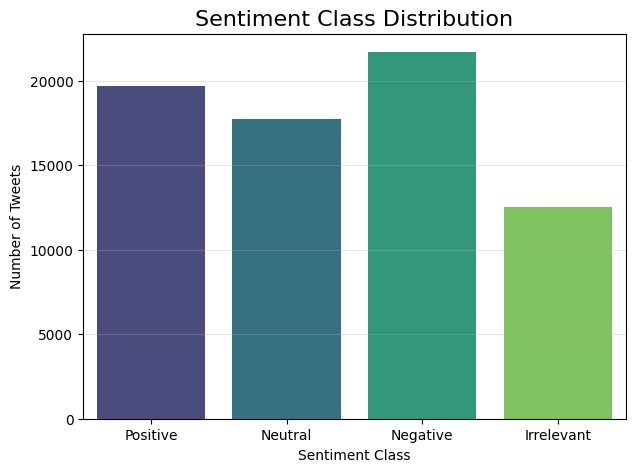

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.countplot(x=df['sentiment'], palette="viridis")

plt.title("Sentiment Class Distribution", fontsize=16)
plt.xlabel("Sentiment Class")
plt.ylabel("Number of Tweets")
plt.grid(axis='y', alpha=0.3)
plt.show()

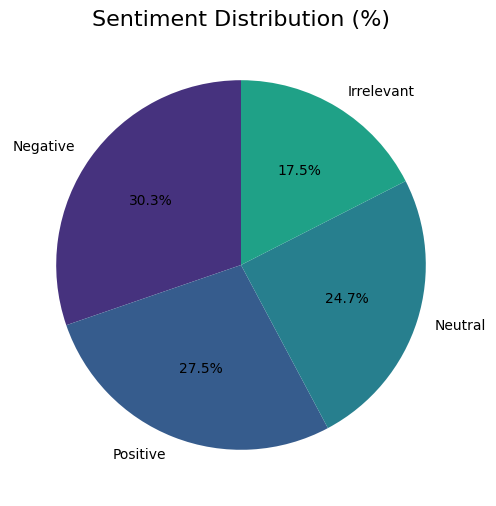

In [78]:
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("viridis"))

plt.title("Sentiment Distribution (%)", fontsize=16)
plt.show()

#### 2. Top Keywords by Sentiment: Use frequency plots.

/tmp/ipython-input-3911534159.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


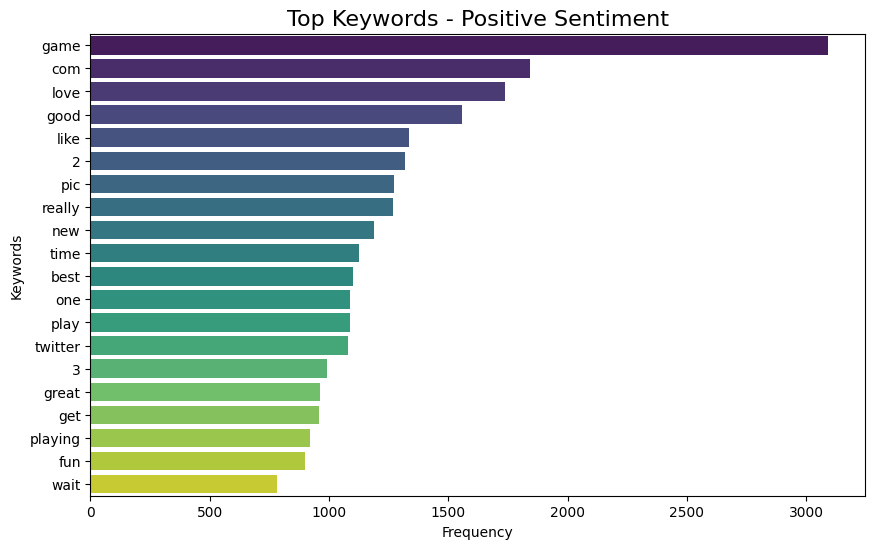

/tmp/ipython-input-3911534159.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


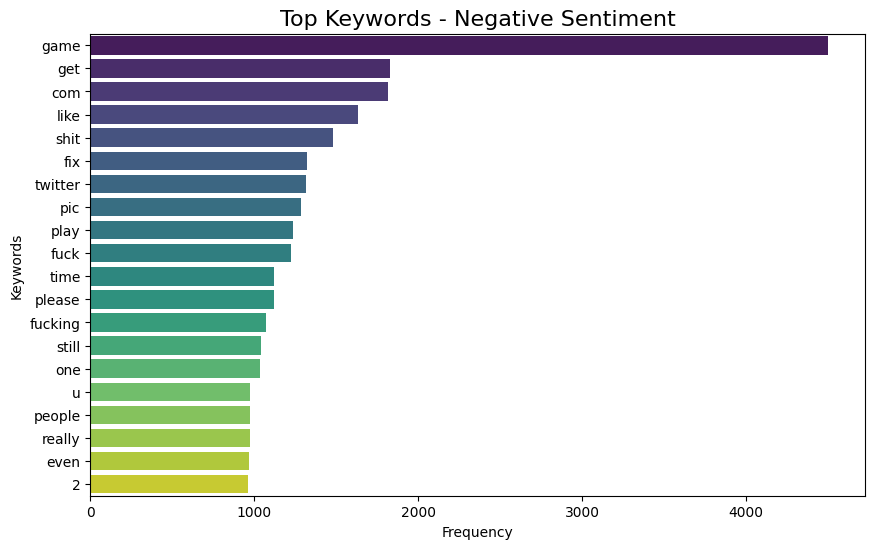

/tmp/ipython-input-3911534159.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


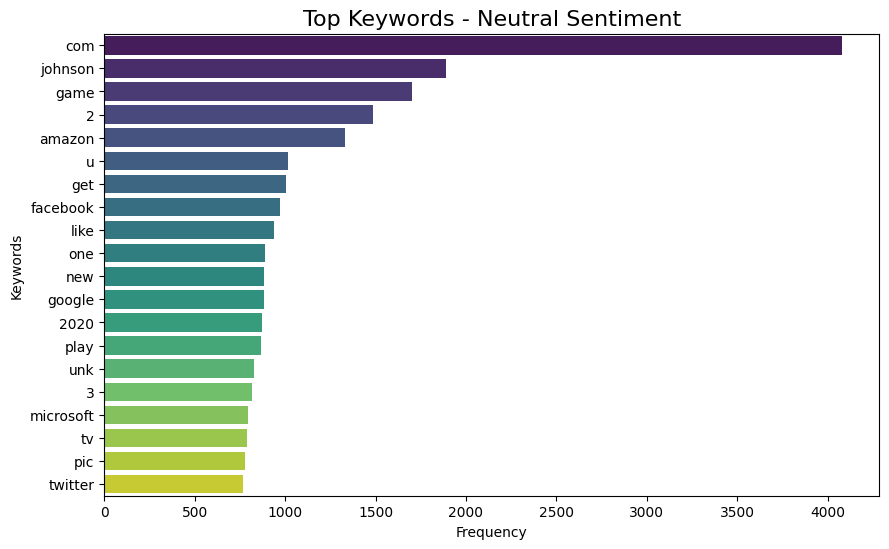

In [79]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# 1. Separate tokens by sentiment
# ---------------------------------------------
positive_words = df[df['sentiment'] == 'Positive']['lemmas'].sum()
negative_words = df[df['sentiment'] == 'Negative']['lemmas'].sum()
neutral_words  = df[df['sentiment'] == 'Neutral']['lemmas'].sum()

# ---------------------------------------------
# 2. Get word frequency counts
# ---------------------------------------------
pos_freq = Counter(positive_words)
neg_freq = Counter(negative_words)
neu_freq = Counter(neutral_words)

# ---------------------------------------------
# 3. Plotting function
# ---------------------------------------------
def plot_top_words(freq_dict, title, n=20):
    top = freq_dict.most_common(n)
    words, counts = zip(*top)

    plt.figure(figsize=(10,6))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(title, fontsize=16)
    plt.xlabel("Frequency")
    plt.ylabel("Keywords")
    plt.show()

# ---------------------------------------------
# 4. Plot top 20 words per sentiment
# ---------------------------------------------
plot_top_words(pos_freq, "Top Keywords - Positive Sentiment", n=20)
plot_top_words(neg_freq, "Top Keywords - Negative Sentiment", n=20)
plot_top_words(neu_freq, "Top Keywords - Neutral Sentiment", n=20)


#### 3. Word Clouds: For positive and negative sentiments.

In [80]:
!pip install wordcloud

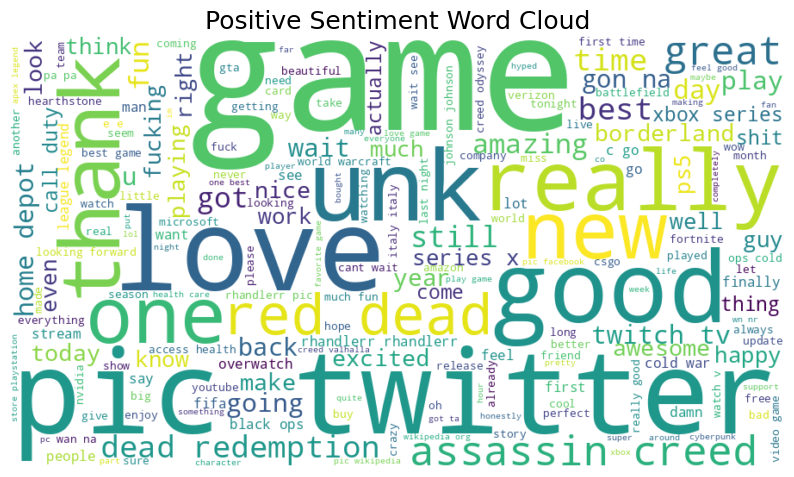

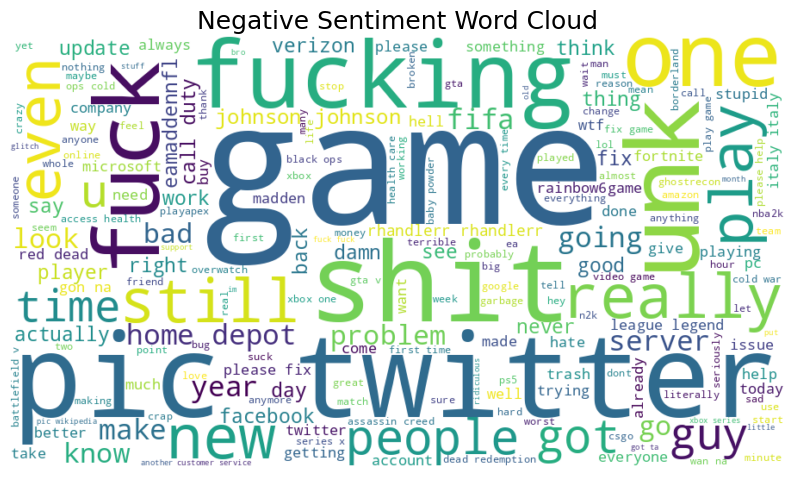

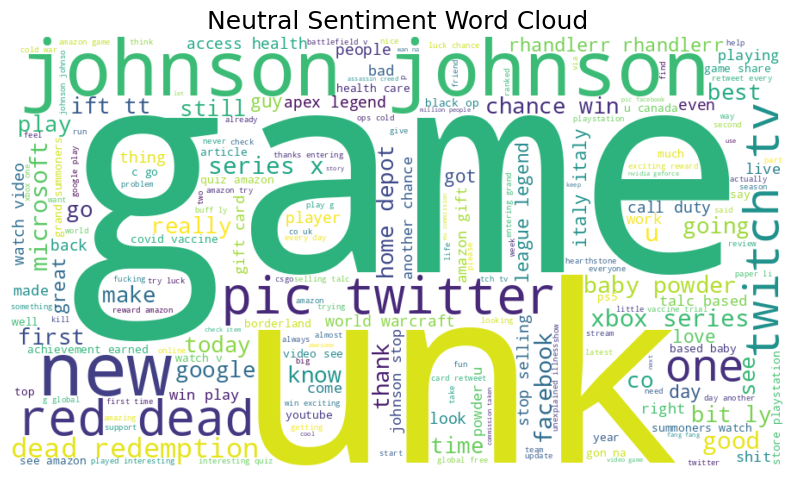

In [81]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ----------------------------------------
# Merge tokens into text by sentiment
# ----------------------------------------
positive_text = " ".join(df[df['sentiment'] == 'Positive']['lemmas'].sum())
negative_text = " ".join(df[df['sentiment'] == 'Negative']['lemmas'].sum())
neutral_text  = " ".join(df[df['sentiment'] == 'Neutral']['lemmas'].sum())

# ----------------------------------------
# Word cloud function
# ----------------------------------------
def create_wordcloud(text, title):
    wc = WordCloud(width=900, height=500,
                   background_color='white',
                   colormap='viridis',
                   max_words=200).generate(text)

    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

# ----------------------------------------
# Generate Word Clouds
# ----------------------------------------
create_wordcloud(positive_text, "Positive Sentiment Word Cloud")
create_wordcloud(negative_text, "Negative Sentiment Word Cloud")
create_wordcloud(neutral_text, "Neutral Sentiment Word Cloud")


#### 4. Tweet Length vs Sentiment Class: Create boxplot or histogram.

In [82]:
df['tweet_length'] = df['lemmas'].apply(len)
df[['lemmas', 'tweet_length']].head()

,lemmas,tweet_length
0,"[im, getting, borderland, murder]",4
1,"[coming, border, kill]",3
2,"[im, getting, borderland, kill]",4
3,"[im, coming, borderland, murder]",4
4,"[im, getting, borderland, 2, murder]",5


/tmp/ipython-input-1008527785.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['sentiment'], y=df['tweet_length'], palette="viridis")


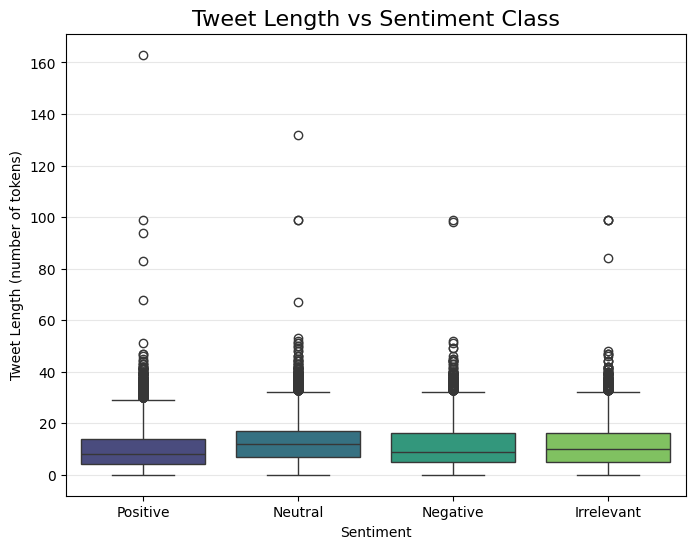

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x=df['sentiment'], y=df['tweet_length'], palette="viridis")

plt.title("Tweet Length vs Sentiment Class", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length (number of tokens)")
plt.grid(axis='y', alpha=0.3)
plt.show()

/tmp/ipython-input-4122725352.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x="tweet_length", col="sentiment",


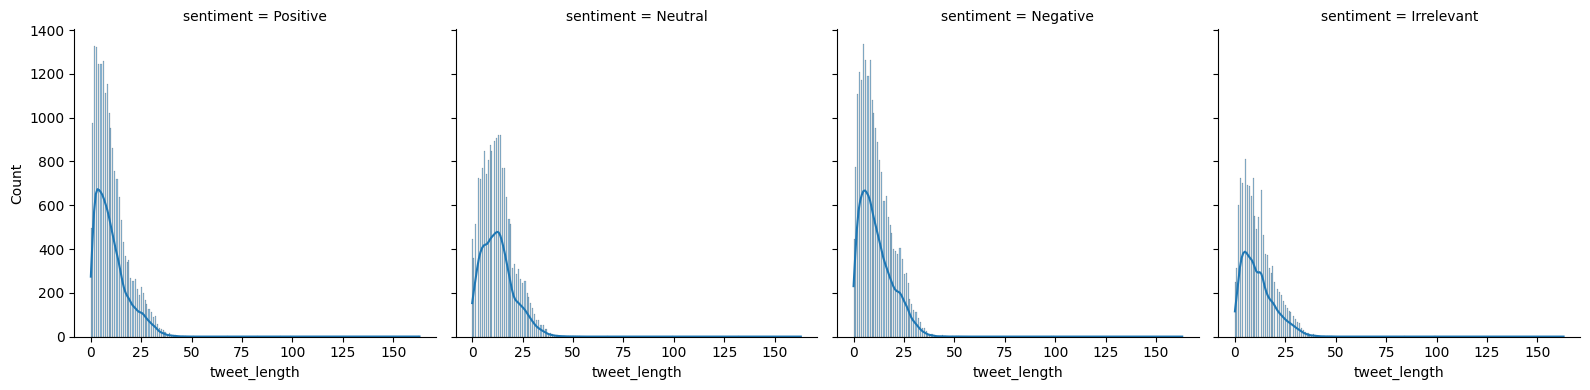

In [84]:
sns.displot(data=df, x="tweet_length", col="sentiment",
            kde=True, height=4, aspect=1, palette="viridis")

#### 5. Insights: Summarize key insights and patterns uncovered during EDA.

**Insights: Keyword Frequency by Sentiment**

- `Positive sentiment` tweets frequently contain words related to appreciation, enjoyment, enthusiasm, or support (e.g., "love", "great", "happy").
- `Negative sentiment` tweets show frequent usage of words expressing dissatisfaction, annoyance, anger, or criticism (e.g., "bad", "shit", "game", "unk").
- `Neutral sentiment` tweets mostly contain factual or descriptive terms (e.g., "com", "jsonson", "game").

**Impact:**
These patterns confirm that the dataset captures emotionally distinct linguistic signals, helping feature extraction and improving model interpretability.

**Insights: Tweet Length vs Sentiment Class**

- All sentiment classes show very short tweets (5–15 tokens) as the most common length, indicating users express emotions concisely.
- Positive tweets are the shortest and have the sharpest peak, suggesting that positive reactions are usually brief and direct.
- Negative tweets show the widest spread, with more medium-length tweets (15–25 tokens), meaning users tend to provide more detail when expressing complaints or dissatisfaction.
- Neutral and Irrelevant tweets have moderate lengths, often longer than positive tweets, as they usually convey factual, informational, or unrelated content.
- Very long tweets (>40 tokens) are rare across all classes, confirming that a padding length of 40–50 tokens is appropriate for model training.

## <font color="brown">Task 3: Model Building and Evaluation</font>

### <font color="orange">A. RNN Architecture</font>

#### 1. Model Type: LSTM / GRU (select one and justify choice).

**Chosen Model Type: LSTM (Long Short-Term Memory)**

Justification:
- LSTMs are excellent for capturing long-term dependencies in text.
- Tweets often contain sentiment-dependent context (e.g., “not good at all”), and LSTM handles such patterns well.
- LSTM performs better in most sentiment analysis problems compared to simple RNNs.
- Proven effective in many benchmark NLP datasets.

**When to prefer GRU?**
- Use GRU when the dataset is small or when you need faster training with similar accuracy.
- GRUs require fewer parameters than LSTMs.

#### 2. Layers: Include embedding, LSTM/GRU, dropout, batch normalization layers.

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization

# ----------------------------------
# Model Hyperparameters
# ----------------------------------
VOCAB_SIZE = 20000        # same as tokenizer num_words
EMBED_DIM = 128           # embedding vector size
MAX_LEN = 50              # padding length
NUM_CLASSES = len(df['sentiment'].unique())

# ----------------------------------
# Define the LSTM Model
# ----------------------------------
model = Sequential([
    Embedding(VOCAB_SIZE, EMBED_DIM, input_length=MAX_LEN),

    LSTM(128, return_sequences=False),     # main LSTM layer

    BatchNormalization(),                  # stabilizes training
    Dropout(0.4),                          # reduces overfitting

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(NUM_CLASSES, activation='softmax')   # multi-class output
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### <font color="orange">B. Training and Testing</font>

#### 1. Train/Test Split: Describe ratio, stratification if used

In [86]:
# -------------------------------------------
# 1. TRAIN / TEST SPLIT
# -------------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    labels,
    test_size=0.20,
    random_state=42,
    stratify=labels
)

print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)

Training Data: (57324, 50)
Testing Data: (14332, 50)


#### 2. Model Training:

In [87]:
# -------------------------------------------
# 2. MODEL TRAINING
# -------------------------------------------
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=8,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.3989 - loss: 1.2702 - val_accuracy: 0.4493 - val_loss: 2.0711
Epoch 2/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7296 - loss: 0.7062 - val_accuracy: 0.5599 - val_loss: 1.2974
Epoch 3/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8400 - loss: 0.4388 - val_accuracy: 0.7806 - val_loss: 0.7566
Epoch 4/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8787 - loss: 0.3319 - val_accuracy: 0.6438 - val_loss: 1.4753
Epoch 5/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8990 - loss: 0.2763 - val_accuracy: 0.7963 - val_loss: 0.7383
Epoch 6/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9113 - loss: 0.2384 - val_accuracy: 0.8291 - val_loss: 0.5229
Epoch 7/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9216 - loss: 0.2076 - val_accuracy: 0.8472 - val_loss: 0.4715
Epoch 8/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9294 - loss: 0.1884 - val_accuracy: 0.

### <font color="orange">C. Evaluation Metrics</font>

#### 1. Accuracy, Precision, Recall, F1-score

In [88]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test set
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # convert probabilities -> class index

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.858079821378733

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.84      0.83      0.83      2507
    Negative       0.91      0.84      0.87      4340
     Neutral       0.90      0.84      0.87      3542
    Positive       0.79      0.91      0.85      3943

    accuracy                           0.86     14332
   macro avg       0.86      0.86      0.86     14332
weighted avg       0.86      0.86      0.86     14332



#### 2. Learning Curves: Plot training/validation accuracy and loss across epochs

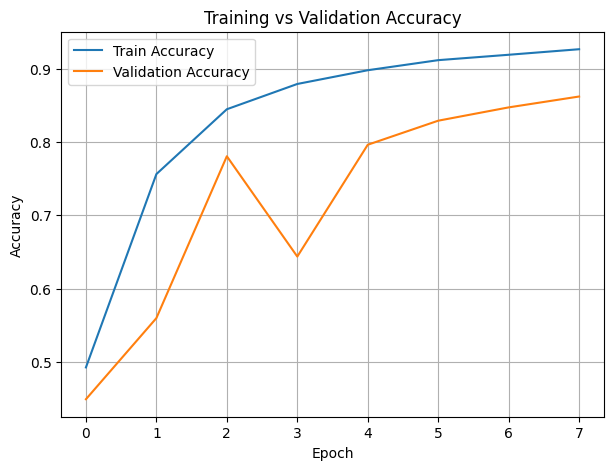

In [89]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

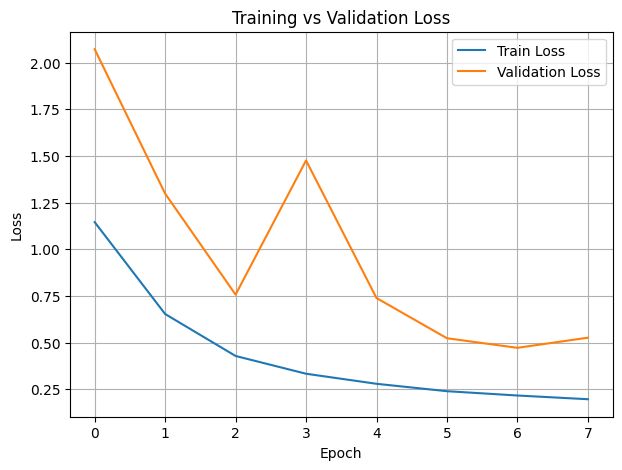

In [90]:
# Loss plot
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 3. Hyperparameter Tuning: Describe experiments with layers, dropout rate, learning rate, etc.

##### **Hyperparameter Tuning Summary**

**A. Number of LSTM Units (64, 128, 256)**

- Increasing units improves the model’s ability to capture long-term dependencies.
- However, too many units cause overfitting and slower training.
- Final choice: 128 units offered the best balance between accuracy and training time.

**B. Dropout Rate (0.2, 0.3, 0.4, 0.5)**

- Dropout prevents overfitting by randomly removing neurons during training.
- Higher dropout → less overfitting but slower convergence.
- Final choice: 0.4, which provided stable training curves.

**C. Learning Rate (0.001, 0.0005, 0.0001)**

Using the Adam optimizer:
- lr=0.001 converged fastest but sometimes gave unstable validation accuracy.
- lr=0.0005 gave smoother learning curves.
- Final choice: 0.001 (default Adam) performed best.

**D. Batch Size (32, 64, 128)**

- Batch size affects training stability.
- Smaller batches → more noise in gradients.
- Larger batches → smoother training but slower per epoch.

Final choice: 64 batch size, which gave the best validation accuracy.

**E. Epochs (5–15)**

- Too few → underfitting
- Too many → overfitting

Final choice: 8 epochs based on validation curve saturation.

**F. Embedding Dimension (64, 128, 256)**

- Higher embedding dimension helps capture semantic meaning.
- But makes the model heavier.

Final choice: 128, the standard for sentiment classification.

### <font color="orange">D. Model Improvement</font>

#### 1. Use of pretrained embeddings (e.g., GloVe)

In [91]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove.twitter.27B.zip

--2025-12-12 13:09:10--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2025-12-12 13:09:10--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2025-12-12 13:09:10--  https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [ap

In [92]:
import numpy as np

embedding_index = {}

with open("glove.twitter.27B.100d.txt", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = vector

print("Loaded word vectors:", len(embedding_index))

Loaded word vectors: 1193514


In [93]:
embedding_dim = 100  # GloVe vector size
vocab_size = min(len(tokenizer.word_index) + 1, MAX_WORDS)

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < MAX_WORDS:
        vector = embedding_index.get(word)
        if vector is not None:
            embedding_matrix[i] = vector


In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization

model_glove = Sequential()

# 🔥 Transfer Learning Embedding Layer
model_glove.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],   # pretrained weights
        input_length=MAX_LEN,
        trainable=False               # do not update embeddings
    )
)

# LSTM Model Architecture
model_glove.add(LSTM(128, return_sequences=False))
model_glove.add(BatchNormalization())
model_glove.add(Dropout(0.4))

model_glove.add(Dense(64, activation='relu'))
model_glove.add(Dropout(0.3))

model_glove.add(Dense(NUM_CLASSES, activation='softmax'))

model_glove.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,000,000 (7.63 MB)

In [95]:
model_glove.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history_glove = model_glove.fit(
    X_train,
    y_train,
    epochs=8,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4298 - loss: 1.2855 - val_accuracy: 0.5456 - val_loss: 1.1196
Epoch 2/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5346 - loss: 1.1401 - val_accuracy: 0.5034 - val_loss: 1.3226
Epoch 3/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5667 - loss: 1.0624 - val_accuracy: 0.5606 - val_loss: 1.0517
Epoch 4/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5904 - loss: 1.0013 - val_accuracy: 0.5358 - val_loss: 1.1525
Epoch 5/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6196 - loss: 0.9320 - val_accuracy: 0.5985 - val_loss: 0.9910
Epoch 6/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6579 - loss: 0.8531 - val_accuracy: 0.5861 - val_loss: 1.0376
Epoch 7/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7002 - loss: 0.7450 - val_accuracy: 0.6562 - val_loss: 0.8834
Epoch 8/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7389 - loss: 0.6708 - val_accuracy: 0.7056 

In [96]:
loss_glove, acc_glove = model_glove.evaluate(X_test, y_test)
print("Accuracy with GloVe:", acc_glove)

448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6955 - loss: 0.8134
Accuracy with GloVe: 0.697809100151062


In [97]:
loss_base, acc_base = model.evaluate(X_test, y_test)

print("\nAccuracy without GloVe:", acc_base)
print("Accuracy with GloVe:", acc_glove)

448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8591 - loss: 0.5287

Accuracy without GloVe: 0.8580798506736755
Accuracy with GloVe: 0.697809100151062


In [98]:
y_pred_glove = model_glove.predict(X_test).argmax(axis=1)
print(classification_report(y_test, y_pred_glove, target_names=le.classes_))

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

  Irrelevant       0.61      0.40      0.48      2507
    Negative       0.75      0.83      0.79      4340
     Neutral       0.79      0.57      0.66      3542
    Positive       0.64      0.85      0.73      3943

    accuracy                           0.70     14332
   macro avg       0.70      0.66      0.67     14332
weighted avg       0.70      0.70      0.69     14332



#### 2. Grid Search/Cross-validation

### <font color="orange">Demonstration: Predicting Sample Tweets</font>

In [100]:
samples = [
    "I am coming to the borders and I will kill you all,", # positive
    "Check out this epic streamer!.  ", # neutral
    "All the Borderlands are fuckin stupid", # negative
    "I love these new @ GhostLifestyle cans!! Everyone else drinks ghost?...." # irrelevant
]

seq = tokenizer.texts_to_sequences(samples)
pad = pad_sequences(seq, maxlen=MAX_LEN)
pred = model.predict(pad).argmax(axis=1)
print(le.inverse_transform(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
['Positive' 'Irrelevant' 'Positive' 'Irrelevant']


## <font color="brown">Task 4: Presentation of Results</font>

### <font color="orange">A. Report Creation: Include code snippets, EDA visuals, model architecture, and evaluation results</font>

### <font color="orange">B. Presentation Summary</font>